12hrs: Estimated min_cluster_size = 43


/Users/nafiulnipu/Desktop/RA_Projects/Genomic_Vis/GenomeVisProject/data_processing_python/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/nafiulnipu/Desktop/RA_Projects/Genomic_Vis/GenomeVisProject/data_processing_python/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/var/folders/29/w54hnxjs18q9cvq1pfzwym540000gn/T/ipykernel_8634/3176293437.py:40: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



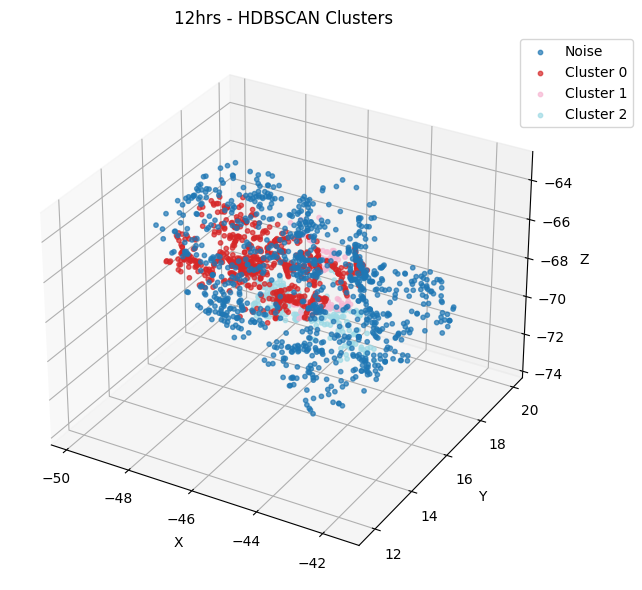

18hrs: Estimated min_cluster_size = 43


/Users/nafiulnipu/Desktop/RA_Projects/Genomic_Vis/GenomeVisProject/data_processing_python/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/nafiulnipu/Desktop/RA_Projects/Genomic_Vis/GenomeVisProject/data_processing_python/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/var/folders/29/w54hnxjs18q9cvq1pfzwym540000gn/T/ipykernel_8634/3176293437.py:40: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



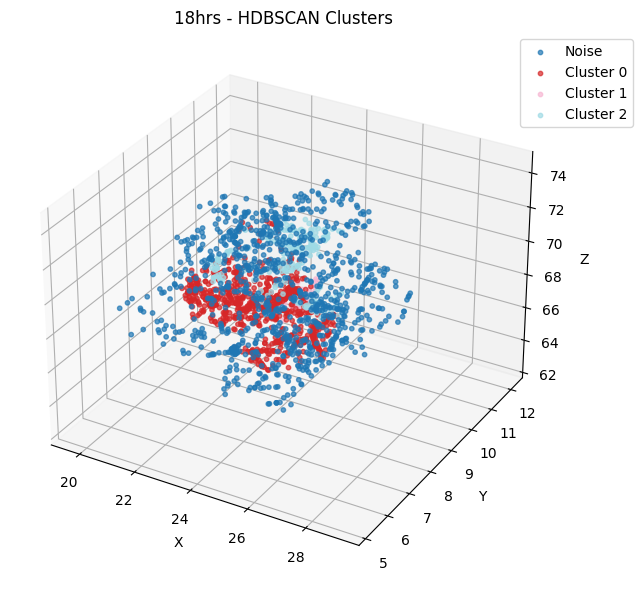

24hrs: Estimated min_cluster_size = 43


/Users/nafiulnipu/Desktop/RA_Projects/Genomic_Vis/GenomeVisProject/data_processing_python/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/nafiulnipu/Desktop/RA_Projects/Genomic_Vis/GenomeVisProject/data_processing_python/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/var/folders/29/w54hnxjs18q9cvq1pfzwym540000gn/T/ipykernel_8634/3176293437.py:40: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



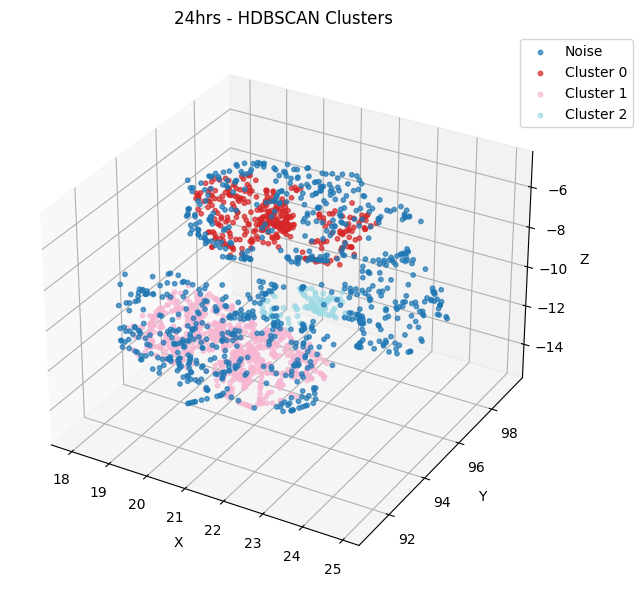

In [102]:
import os
import pandas as pd
import numpy as np
import hdbscan
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from mpl_toolkits.mplot3d import Axes3D

# --- Settings ---
base_dir = "data/green_monkey/all_structure_files/chr1"
timepoints = ["12hrs", "18hrs", "24hrs"]
condition = "vacv"

def get_structure_path(tp):
    return os.path.join(base_dir, tp, condition, f"structure_{tp}_{condition}_gene_info.csv")

def load_gene_positions(file_path):
    df = pd.read_csv(file_path)
    return df[['gene_name', 'middle_x', 'middle_y', 'middle_z']].dropna()

def estimate_min_cluster_size(coords):
    return max(5, int(np.sqrt(len(coords))))  # Lower bound of 5

def plot_k_distances(coords, k=10, title=None):
    nbrs = NearestNeighbors(n_neighbors=k).fit(coords)
    distances, _ = nbrs.kneighbors(coords)
    k_distances = np.sort(distances[:, k - 1])
    plt.plot(k_distances)
    plt.title(title or f"{k}-NN Distance Plot")
    plt.xlabel("Sorted Points")
    plt.ylabel(f"{k}th NN Distance")
    plt.grid(True)
    plt.show()

def plot_3d_clusters(coords, labels, title=None):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    unique_labels = np.unique(labels)
    colors = plt.cm.get_cmap('tab20', len(unique_labels))

    for i, label in enumerate(unique_labels):
        idx = labels == label
        ax.scatter(coords[idx, 0], coords[idx, 1], coords[idx, 2],
                   s=10, label=f"Cluster {label}" if label != -1 else "Noise",
                   color=colors(i), alpha=0.7)

    ax.set_title(title or "3D HDBSCAN Clusters")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
    plt.tight_layout()
    plt.show()

# --- Main Execution ---
results = []

for tp in timepoints:
    path = get_structure_path(tp)
    df = load_gene_positions(path)

    coords = df[['middle_x', 'middle_y', 'middle_z']].values
    genes = df['gene_name'].tolist()

    # Estimate cluster size
    min_cluster_size = estimate_min_cluster_size(coords)
    print(f"{tp}: Estimated min_cluster_size = {min_cluster_size}")

    # Optional: plot elbow
    # plot_k_distances(coords, k=10, title=f"{tp} - 10-NN Elbow")

    # Run HDBSCAN
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    labels = clusterer.fit_predict(coords)

    # Optional: plot 3D cluster
    plot_3d_clusters(coords, labels, title=f"{tp} - HDBSCAN Clusters")

    for gene, label in zip(genes, labels):
        results.append({
            'timepoint': tp,
            'gene_name': gene,
            'cluster': label
        })

# Combine and save
cluster_df = pd.DataFrame(results)
# cluster_df.to_csv("chr1_vacv_spatial_communities_hdbscan_auto.csv", index=False)


In [97]:
cluster_df

,timepoint,gene_name,cluster
0,12hrs,SCGB1C1,-1
1,12hrs,ODF3,-1
2,12hrs,BET1L,-1
3,12hrs,RIC8A,-1
4,12hrs,SIRT3,0
...,...,...,...
5788,24hrs,LOC103248902,-1
5789,24hrs,LOC103248901,-1
5790,24hrs,LOC103248904,-1
5791,24hrs,LOC103248905,-1


In [98]:
cluster_counts = cluster_df.groupby("timepoint")["cluster"].nunique()
print("Communities per timepoint:\n", cluster_counts)


Communities per timepoint:
 timepoint
12hrs    4
18hrs    4
24hrs    4
Name: cluster, dtype: int64


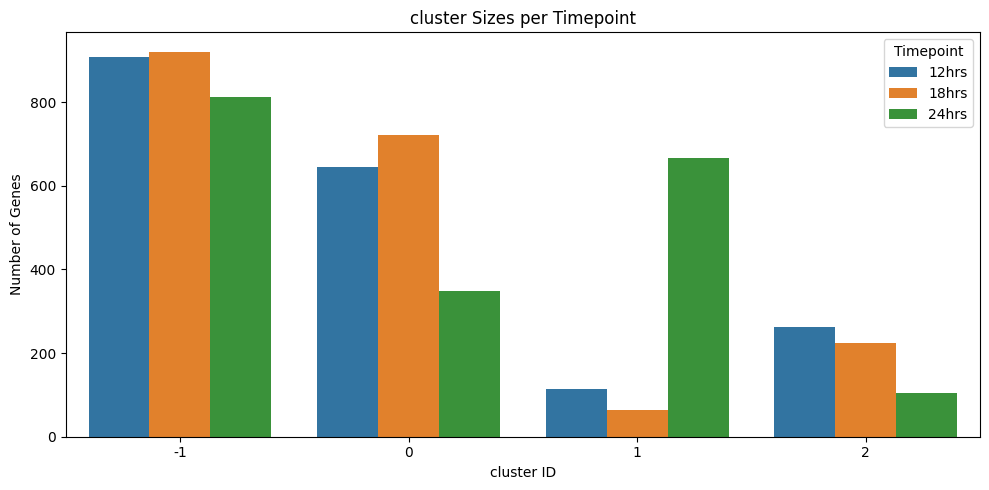

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=cluster_df, x="cluster", hue="timepoint")
plt.title("cluster Sizes per Timepoint")
plt.xlabel("cluster ID")
plt.ylabel("Number of Genes")
plt.legend(title="Timepoint")
plt.tight_layout()
plt.show()


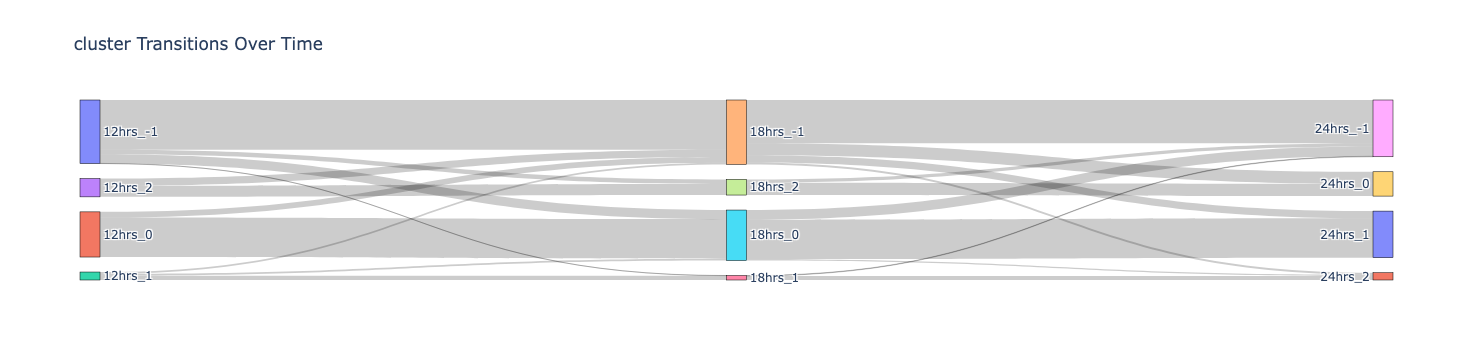

In [100]:
pivot = cluster_df.pivot(index='gene_name', columns='timepoint', values='cluster')
pivot = pivot.dropna()  # remove genes missing at any timepoint

from collections import Counter

# Get timepoints in order
timepoints = pivot.columns.tolist()

# Build transitions between consecutive timepoints
transitions = []

for i in range(len(timepoints) - 1):
    src_tp = timepoints[i]
    tgt_tp = timepoints[i + 1]

    src = pivot[src_tp].astype(str)
    tgt = pivot[tgt_tp].astype(str)
    
    pairs = list(zip([f"{src_tp}_{s}" for s in src], [f"{tgt_tp}_{t}" for t in tgt]))
    transitions.extend(pairs)

transition_counts = Counter(transitions)

import plotly.graph_objects as go

# Build list of unique labels
labels = sorted(set([src for src, _ in transition_counts] + [tgt for _, tgt in transition_counts]))
label_idx = {label: i for i, label in enumerate(labels)}

# Source, target, and value lists
sources = [label_idx[src] for src, tgt in transition_counts]
targets = [label_idx[tgt] for src, tgt in transition_counts]
values = list(transition_counts.values())

# Create Sankey plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    ))])

fig.update_layout(title_text="cluster Transitions Over Time", font_size=12)
fig.show()


In [ ]:
def estimate_min_cluster_size(coords):
    return max(5, int(np.sqrt(len(coords))))  # Lower bound of 5